# ETL Project Name: Boston Airbnb market analysis
Primary independent variable: Price of the listing 
Other dependent variables: availability, review, location, host since, response time, host acceptance rate, no. of host listing
Plots 
Prices vs review (How to categorize a review as Good, Bad and Neutral?)
Price vs host location
Price vs host since
Price vs host response time
Price vs host acceptance rate
Price vs No. of host listing


## Import Packages and Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pymysql
pymysql.install_as_MySQLdb()
from sqlalchemy import create_engine
#from ET_mysql_key import ET_key
from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"



### Import csv files

In [2]:
# File to Load

# 1.) Listing file had information of each listing in Boston area. 
#There are 95 columns with listing info, space and features, pictures, availability, price, host reviews, policy etc. 
listing_data_to_load = "data/listings.csv"

# 2.) Calender file has availibility of rentals. It has listing_id, date, available (t or f) and price
availability_data_to_load = "data/calendars.csv"

# 3.) Review file contanin information such as listing_id, id, date, reviewer_id, reviewer_name & comments
review_data_to_load = "data/reviews.csv"


In [88]:
listing=pd.read_csv(listing_data_to_load)
listing.columns

Index(['listing_id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price',
    

## EXTRACTION

In [3]:
# Reading files and then storing into Pandas data frame. # Create DataFrames
# used pd.read to read & give out DataFrame(or TextParser) for the variables assigned to the pandas DateFrame are
#availability_data_to_load & listing_data_to_load & review_data_to_load  

In [4]:
# Listing data
# Show number of row and columns.# Display the data table for preview. Used head() to get the three rows
listing_df = pd.read_csv(listing_data_to_load)
listing_df.shape
pd.set_option('display.max_rows', 3)
pd.set_option('display.max_columns', 10)
pd.set_option('display.width', 100)
pd.set_option('precision', 5)
listing_df.style.highlight_null(null_color='red')
#lising_df.style
listing_df.head(3)
listing_df

,listing_id,listing_url,scrape_id,last_scraped,name,...,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,2.01609e+13,9/7/2016,Sunny Bungalow in the City,...,moderate,f,f,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3584,14504422,https://www.airbnb.com/rooms/14504422,2.01609e+13,9/7/2016,(K1) Private Room near Harvard/MIT,...,flexible,f,f,3,NaN


In [5]:
# Availability data.
# Show number of row and columns.# Display the data table for preview. Used head() to get the three rows
availability_df = pd.read_csv(availability_data_to_load)
availability_df.shape
#pd.set_option('display.max_rows', 3)
#pd.set_option('display.max_columns', 5)
#pd.set_option('display.width', 100)
pd.set_option('precision', 5)
listing_df.style.highlight_null(null_color='red')
availability_df.head(3)
availability_df

,listing_id,date,available,price
0,12147973,9/5/2017,f,NaN
...,...,...,...,...
1048574,5844314,11/15/2016,t,$62.00


In [6]:
# Review data
# Show number of row and columns.Display the data table for preview. Used head() to get the three rows
review_df = pd.read_csv(review_data_to_load)
review_df.shape
pd.option_context('display.colheader_justify','left')
review_df.style.set_properties(**{'text-align': 'left'})
review_df.head(3)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,5/21/2013,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,5/29/2013,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,6/6/2013,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...


In [80]:
listing_df.columns

Index(['listing_id', 'minimum_nights', 'host_response_rate', 'host_acceptance_rate', 'price', 'host_response_time'], dtype='object')

## TRANSFORM: Cleaning and Merging 

In [7]:
# Listing data.
# Show number of row and columns.
# Show stats.
# Removing Replace NaN with zero. unnecssary columns, standardizing column names, and creating a new df

In [8]:
listing_df = listing_df[["listing_id","minimum_nights","host_response_rate","host_acceptance_rate","price","host_response_time"]]
listing_df

,listing_id,minimum_nights,host_response_rate,host_acceptance_rate,price,host_response_time
0,12147973,2,NaN,NaN,$250.00,NaN
...,...,...,...,...,...,...
3584,14504422,1,100%,95%,$65.00,within an hour


In [9]:
#merge_table.head(5)
# Combine the data into a single dataset
    #used the pd.merge merge DataFrame city_pd and ride_pd based on the common list city 
    #ALso, used how left based on result table needed and also specified how as left
    #Used head() to get the five rows
mergeal_table = pd.merge(availability_df,listing_df,how="inner",on=["listing_id","listing_id"])
mergealr_table = pd.merge(mergeal_table,review_df,how="inner",on=["listing_id","listing_id"])
# Display the data table for preview
mergealr_table.head(5)
#mergealr_table

,listing_id,date_x,available,price_x,minimum_nights,...,id,date_y,reviewer_id,reviewer_name,comments
0,3075044,8/22/2017,t,$65.00,2,...,13631717,6/1/2014,9645972,Dmitrii,Andrea is a great host. Neighborhood is wonder...
...,...,...,...,...,...,...,...,...,...,...,...
4,3075044,8/22/2017,t,$65.00,2,...,20322887,9/27/2014,21706950,Xinny,Me and my friend were so happy about Andrea's ...


In [91]:
mergealr_table['latitude']=listing['latitude']
mergealr_table['longitude']=listing['longitude']

In [92]:
mergealr_table.columns

Index(['listing_id', 'date_x', 'available', 'price_x($)', 'minimum_nights', 'host_response_rate(%)', 'host_acceptance_rate(%)', 'host_response_time', 'reviewer_id', 'reviewer_name', 'latitude', 'longitude'], dtype='object')

In [11]:
#pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
mergealr_table.describe()

,listing_id,minimum_nights,id,reviewer_id
count,2.08138e+07,2.08138e+07,2.08138e+07,2.08138e+07
mean,4.61569e+06,2.18390e+00,5.14791e+07,2.73901e+07
std,3.80190e+06,4.10347e+00,2.81472e+07,2.22153e+07
min,5.50600e+03,1.00000e+00,1.02100e+03,1.43000e+02
25%,1.22305e+06,1.00000e+00,2.83427e+07,8.52966e+06
50%,3.96953e+06,2.00000e+00,5.13218e+07,2.22434e+07
75%,7.28188e+06,2.00000e+00,7.61251e+07,4.12866e+07
max,1.48237e+07,3.00000e+02,9.99905e+07,9.32760e+07


In [12]:
#Rename column to show the units such as % or $
#df.rename(index=str, columns={"A": "a", "C": "c"})
mergealr_table = mergealr_table.rename(index=str, columns={
    "price_x": "price_x($)",
    "host_response_rate": "host_response_rate(%)",
    "host_acceptance_rate": "host_acceptance_rate(%)"})

In [13]:
#Identify missin values. Note after the dataframe was created the blanks were assigned a NaN value
mergealr_table["price_x($)"]

0           $65.00 
1           $65.00 
2           $65.00 
3           $65.00 
4           $65.00 
5           $65.00 
6           $65.00 
7           $65.00 
8           $65.00 
9           $65.00 
10          $65.00 
11          $65.00 
12          $65.00 
13          $65.00 
14          $65.00 
15          $65.00 
16          $65.00 
17          $65.00 
18          $65.00 
19          $65.00 
20          $65.00 
21          $65.00 
22          $65.00 
23          $65.00 
24          $65.00 
25          $65.00 
26          $65.00 
27          $65.00 
28          $65.00 
29          $65.00 
30          $65.00 
31          $65.00 
32          $65.00 
33          $65.00 
34          $65.00 
35          $65.00 
36          $65.00 
37          $65.00 
38          $65.00 
39          $65.00 
40          $65.00 
41          $65.00 
42          $65.00 
43          $65.00 
44          $65.00 
45          $65.00 
46          $65.00 
47          $65.00 
48          $65.00 
49          $65.00 


In [14]:
#Fill the NaN with avergae value of the rest of the data and i.e. is $209. The command below to replace did not work for somw reason
#mergealr_table["price_x($)"] = mergealr_table["price_x($)"].replace(r'^\s+$', 208, regex=True)
mergealr_table['price_x($)'] = mergealr_table['price_x($)'].fillna(209)

In [15]:
#Verified that the values got replaced
#mergealr_table["price_x"].tolist()
mergealr_table["price_x($)"]

0           $65.00 
1           $65.00 
2           $65.00 
3           $65.00 
4           $65.00 
5           $65.00 
6           $65.00 
7           $65.00 
8           $65.00 
9           $65.00 
10          $65.00 
11          $65.00 
12          $65.00 
13          $65.00 
14          $65.00 
15          $65.00 
16          $65.00 
17          $65.00 
18          $65.00 
19          $65.00 
20          $65.00 
21          $65.00 
22          $65.00 
23          $65.00 
24          $65.00 
25          $65.00 
26          $65.00 
27          $65.00 
28          $65.00 
29          $65.00 
30          $65.00 
31          $65.00 
32          $65.00 
33          $65.00 
34          $65.00 
35          $65.00 
36          $65.00 
37          $65.00 
38          $65.00 
39          $65.00 
40          $65.00 
41          $65.00 
42          $65.00 
43          $65.00 
44          $65.00 
45          $65.00 
46          $65.00 
47          $65.00 
48          $65.00 
49          $65.00 


In [16]:
#Identify if host_acceptance_rate(%) has blanks or NaN  
mergealr_table['host_acceptance_rate(%)']

0           100%
1           100%
2           100%
3           100%
4           100%
5           100%
6           100%
7           100%
8           100%
9           100%
10          100%
11          100%
12          100%
13          100%
14          100%
15          100%
16          100%
17          100%
18          100%
19          100%
20          100%
21          100%
22          100%
23          100%
24          100%
25          100%
26          100%
27          100%
28          100%
29          100%
30          100%
31          100%
32          100%
33          100%
34          100%
35          100%
36          100%
37          100%
38          100%
39          100%
40          100%
41          100%
42          100%
43          100%
44          100%
45          100%
46          100%
47          100%
48          100%
49          100%
50          100%
51          100%
52          100%
53          100%
54          100%
55          100%
56          100%
57          100%
58          10

In [17]:
# Replace the blanks with average of the rest of the values which is 50%
mergealr_table['host_acceptance_rate(%)'] = mergealr_table['host_acceptance_rate(%)'].fillna(50)

In [18]:
#Verify if the blanks are filled in with 50%
mergealr_table['host_acceptance_rate(%)']

0           100%
1           100%
2           100%
3           100%
4           100%
5           100%
6           100%
7           100%
8           100%
9           100%
10          100%
11          100%
12          100%
13          100%
14          100%
15          100%
16          100%
17          100%
18          100%
19          100%
20          100%
21          100%
22          100%
23          100%
24          100%
25          100%
26          100%
27          100%
28          100%
29          100%
30          100%
31          100%
32          100%
33          100%
34          100%
35          100%
36          100%
37          100%
38          100%
39          100%
40          100%
41          100%
42          100%
43          100%
44          100%
45          100%
46          100%
47          100%
48          100%
49          100%
50          100%
51          100%
52          100%
53          100%
54          100%
55          100%
56          100%
57          100%
58          10

In [19]:
#Identify if host_response_rate(%) has blanks or NaN  
mergealr_table['host_response_rate(%)']

0           100%
1           100%
2           100%
3           100%
4           100%
5           100%
6           100%
7           100%
8           100%
9           100%
10          100%
11          100%
12          100%
13          100%
14          100%
15          100%
16          100%
17          100%
18          100%
19          100%
20          100%
21          100%
22          100%
23          100%
24          100%
25          100%
26          100%
27          100%
28          100%
29          100%
30          100%
31          100%
32          100%
33          100%
34          100%
35          100%
36          100%
37          100%
38          100%
39          100%
40          100%
41          100%
42          100%
43          100%
44          100%
45          100%
46          100%
47          100%
48          100%
49          100%
50          100%
51          100%
52          100%
53          100%
54          100%
55          100%
56          100%
57          100%
58          10

In [20]:
# Replace the blanks with average of the rest of the values which is 95%
mergealr_table['host_response_rate(%)'] = mergealr_table['host_response_rate(%)'].fillna(95)

In [21]:
#Verify if the blanks are filled in with 50%
mergealr_table['host_response_rate(%)']

0           100%
1           100%
2           100%
3           100%
4           100%
5           100%
6           100%
7           100%
8           100%
9           100%
10          100%
11          100%
12          100%
13          100%
14          100%
15          100%
16          100%
17          100%
18          100%
19          100%
20          100%
21          100%
22          100%
23          100%
24          100%
25          100%
26          100%
27          100%
28          100%
29          100%
30          100%
31          100%
32          100%
33          100%
34          100%
35          100%
36          100%
37          100%
38          100%
39          100%
40          100%
41          100%
42          100%
43          100%
44          100%
45          100%
46          100%
47          100%
48          100%
49          100%
50          100%
51          100%
52          100%
53          100%
54          100%
55          100%
56          100%
57          100%
58          10

In [22]:
#Change or strip the % as a float type for host_acceptance_rate(%) and host_response_rate(%)
mergealr_table['host_acceptance_rate(%)'] = mergealr_table['host_acceptance_rate(%)'].str.rstrip('%').astype('float')

In [23]:
#mergealr_table['price_x($)'] = mergealr_table['price_x($)'].str.rstrip('$').astype('float')
mergealr_table['price_x($)'] = mergealr_table['price_x($)'].str.replace('$', '')
mergealr_table['price_x($)'] = mergealr_table['price_x($)'].str.replace(',', '')

In [24]:
mergealr_table['price_x($)'] = mergealr_table['price_x($)'].astype('float')

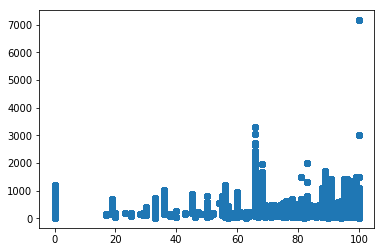

In [25]:
price=mergealr_table['price_x($)']
host_acceptance_rate=mergealr_table['host_acceptance_rate(%)']
plt.scatter(host_acceptance_rate, price)
plt.show()

In [26]:
#mergealr_table['host_response_time']

In [27]:
y_pos=mergealr_table.groupby(['host_response_time']).count()
y_pos

,listing_id,date_x,available,price_x($),minimum_nights,host_response_rate(%),host_acceptance_rate(%),price_y,id,date_y,reviewer_id,reviewer_name,comments
host_response_time,,,,,,,,,,,,,
a few days or more,68255,68255,68255,41058,68255,68255,68255,68255,68255,68255,68255,68255,68255
within a day,2104590,2104590,2104590,1276800,2104590,2104590,2104590,2104590,2104590,2104590,2104590,2104590,2103130
within a few hours,5588880,5588880,5588880,3161168,5588880,5588880,5588880,5588880,5588880,5588880,5588880,5588880,5585230
within an hour,12703890,12703890,12703890,8438298,12703890,12703890,12703890,12703890,12703890,12703890,12703890,12703890,12693670


In [28]:
No_of_reservation=y_pos["listing_id"]
x=y_pos.index

In [29]:
# Replace the blanks with average of the rest of the values which is 50%
mergealr_table['listing_id'] = mergealr_table['listing_id'].fillna(1234)

<function matplotlib.pyplot.show(*args, **kw)>

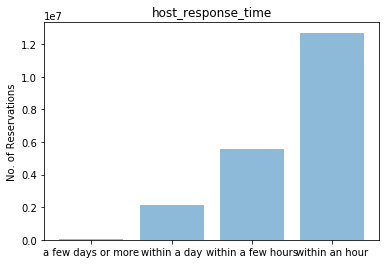

In [30]:
#host_response_time=mergealr_table['host_response_time']
#host_response_time = ('within an hour', 'within a few hours', 'within a day', 'a few days or more')
#y_poss = np.arange(len(host_response_time))
#y_pos = groupby(mergealr_table['host_response_time']).count()
 
plt.bar(x,No_of_reservation,align='center', alpha=0.5)
#plt.xticks(y_pos, host_response_time)
plt.ylabel('No. of Reservations')
plt.title('host_response_time')


#price=mergealr_table['price_x($)']


#plt.bar(host_response_time,price)
plt.show

In [31]:
mergealr_table['host_response_rate(%)'] = mergealr_table['host_response_rate(%)'].str.rstrip('%').astype('float')

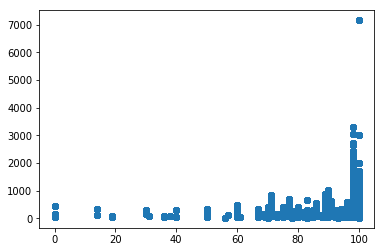

In [32]:
price=mergealr_table['price_x($)']
host_response_rate=mergealr_table['host_response_rate(%)']
plt.scatter(host_response_rate, price)
plt.show()

In [60]:
mergealr_table.columns

Index(['listing_id', 'date_x', 'available', 'price_x($)', 'minimum_nights', 'host_response_rate(%)', 'host_acceptance_rate(%)', 'host_response_time', 'reviewer_id', 'reviewer_name'], dtype='object')

In [ ]:
mergealr_table.add

## LOADING 


In [67]:
mergealr_table.isnull().any()

listing_id                 False
date_x                     False
available                  False
price_x($)                 False
minimum_nights             False
host_response_rate(%)      False
host_acceptance_rate(%)    False
host_response_time         False
reviewer_id                False
reviewer_name              False
dtype: bool

In [41]:
#mergealr_table = mergealr_table[np.isfinite(mergealr_table['price_x($)'])]

In [42]:
#mergealr_table = mergealr_table[np.isfinite(mergealr_table['host_response_rate(%)'])]

In [68]:
#mergealr_table=mergealr_table.drop('minimum_nights', axis=1).drop('reviewer_id', axis=1).drop('comments', axis=1).drop('comments', axis=1).drop('reviewer_name', axis=1).drop('host_response_time', axis=1)

In [72]:
mergealr_table

,listing_id,date_x,available,price_x($),minimum_nights,host_response_rate(%),host_acceptance_rate(%),host_response_time,reviewer_id,reviewer_name
0,3075044,8/22/2017,t,65.0,2,100.0,100.0,within an hour,9645972,Dmitrii
1,3075044,8/22/2017,t,65.0,2,100.0,100.0,within an hour,12020681,Paola
2,3075044,8/22/2017,t,65.0,2,100.0,100.0,within an hour,8165047,Jaydee
3,3075044,8/22/2017,t,65.0,2,100.0,100.0,within an hour,21319433,Anthony
4,3075044,8/22/2017,t,65.0,2,100.0,100.0,within an hour,21706950,Xinny
5,3075044,8/22/2017,t,65.0,2,100.0,100.0,within an hour,22007743,Dennis
6,3075044,8/22/2017,t,65.0,2,100.0,100.0,within an hour,22200211,Quentin
7,3075044,8/22/2017,t,65.0,2,100.0,100.0,within an hour,9395861,Yat
8,3075044,8/22/2017,t,65.0,2,100.0,100.0,within an hour,16903138,Yanfei
9,3075044,8/22/2017,t,65.0,2,100.0,100.0,within an hour,24807052,Angie


In [58]:
mergealr_table.isnull().any()

listing_id                 False
date_x                     False
available                  False
price_x($)                 False
minimum_nights             False
host_response_rate(%)      False
host_acceptance_rate(%)    False
host_response_time         False
reviewer_id                False
reviewer_name              False
dtype: bool

In [71]:
mergealr_table.columns

Index(['listing_id', 'date_x', 'available', 'price_x($)', 'minimum_nights', 'host_response_rate(%)', 'host_acceptance_rate(%)', 'host_response_time', 'reviewer_id', 'reviewer_name'], dtype='object')

In [62]:
mergealr_table.dtypes

listing_id                   int64
date_x                      object
available                   object
price_x($)                 float64
minimum_nights               int64
host_response_rate(%)      float64
host_acceptance_rate(%)    float64
host_response_time          object
reviewer_id                  int64
reviewer_name               object
dtype: object

In [ ]:
#new_mergealr_table=mergealr_table.head(1000)

In [78]:
mergealr_table.to_csv("mergealr6.csv", encoding='utf-8')

#### Alternate method code is mentioned below

In [ ]:
# import mysql.connector

# db = mysql.connector.connect(
#    host="localhost",
#    user="root",
#    passwd="xxxxxxxxx"
# )

# print(db)

In [ ]:
# import pymysql
# conn = pymysql.connect(host='127.0.0.1',
#                       port=3306,
#                       user='root',
#                       passwd='Madhuka1@12',
#                       db='ETL_HW',
#                       charset='utf8')

# mergealr_table.to_sql(name='ETL_HW', con=conn, if_exists = 'replace', index=False)

In [ ]:
# # Creating database connection 
# ET_key for ET's MySQL access only
# connection_string = ("root:{0}@localhost/mergealr_table").format(ET_key)
# engine = create_engine(f'mysql://{connection_string}')

In [ ]:
# Confirming tables 
#engine.table_names()

In [ ]:
# Loading dataframes into database
#listing.to_sql(name='host_response_rate', con=engine, if_exists='replace', index=True)
#listing.to_sql(name='host_acceptance_rate', con=engine, if_exists='replace', index=True)
#availbility_Df.to_sql(name='price_x', con=engine, if_exists='replace', index=True)


In [ ]:
# Confirming that tables loaded successfully
#pd.read_sql("select * from price_x limit 3",con = engine)
#pd.read_sql("select * from host_response_rate",con = engine)
#pd.read_sql("select * from host_acceptance_rate limit 3",con = engine)